# Machine Learning Project Credit Card fraud prediction :
1. To predict the Class of transaction is fraud or not by using Classification Algorithm.
2. Columns of Amount and Time of Transaction the features need to look forward for predicting the Class of output
3. Applying all the Classification Algorithm to achieve accuracy and then concluding the best model performing with the Dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")
import jovian

In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Observation : their seems no null value in the DataSet, procedding with the futher inverstigation**

In [6]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

([<matplotlib.axis.YTick at 0x7fbda9d66b80>,
 [Text(0, 0, ''), Text(0, 0, '')])

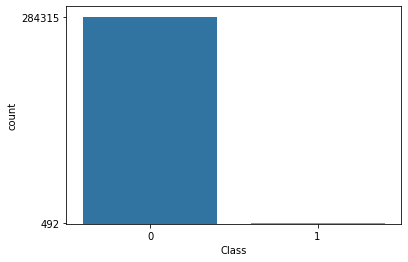

In [7]:
sns.countplot(data=df,x="Class")
plt.yticks(df["Class"].value_counts())

From above method we observe that our data is unbalanced, we need to balance the data using RandomOverSampler.

### Now to split the data into input and output :

In [8]:
x = df.drop("Class",axis=1)
y = df["Class"]

Now to separate data into 30% testing and 70% training data :

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

Now to apply StandardScaling on the 30% testing and 70% training input data :

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
s = StandardScaler()

In [13]:
x_train = s.fit_transform(x_train) # to train and transform
x_test = s.transform(x_test)  # to only transform and not train

### Now to deal with Data unbalancing, we apply RandomOverSampler to balance the minority data equal to majority

In [14]:
from imblearn.over_sampling import RandomOverSampler

In [15]:
ros = RandomOverSampler(random_state=1)

In [16]:
x_train,y_train = ros.fit_resample(x_train,y_train)

In [17]:
x_test,y_test = ros.fit_resample(x_test,y_test)

In [18]:
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

0    199007
1    199007
Name: Class, dtype: int64
0    85308
1    85308
Name: Class, dtype: int64


Data is now balanced, now futher proceeding with Model Performing

### **Model Performing :**

#### create function for modelling :

In [19]:
def model_perform(model):
  model.fit(x_train,y_train)
  y_predict = model.predict(x_test)
  print("Classification_report")
  print(classification_report(y_test,y_predict))
  print("confusion_matrix")
  print(confusion_matrix(y_test,y_predict))
  return model

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

### **1. Logistic Regression : base line model**

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
# to create a object of LogisticRegression :
lgr = LogisticRegression(random_state=1)

In [23]:
# to train and test the model, call function :
lgr = model_perform(lgr)

Classification_report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

confusion_matrix
[[83724  1584]
 [ 8874 76434]]


### **2. DecisionTreeClassifier :**
#### Gini Index :

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
# to create a object of DecisionTreeClassifier :
dt = DecisionTreeClassifier(random_state=1)

In [25]:
dt = model_perform(dt)

Classification_report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85     85308
           1       1.00      0.65      0.79     85308

    accuracy                           0.83    170616
   macro avg       0.87      0.83      0.82    170616
weighted avg       0.87      0.83      0.82    170616

confusion_matrix
[[85275    33]
 [29819 55489]]


In [26]:
dic = {"input":x.columns,"info_gained":dt.feature_importances_}
dic = pd.DataFrame(dic)
dic.sort_values("info_gained",ascending=False)

,input,info_gained
14,V14,0.741951
4,V4,0.044070
10,V10,0.038333
12,V12,0.024610
20,V20,0.018026
13,V13,0.015708
0,Time,0.014060
7,V7,0.012405
19,V19,0.011122
29,Amount,0.010704


#### max_depth :

In [27]:
dt1 = DecisionTreeClassifier(max_depth=2,random_state=1)

In [28]:
dt1 = model_perform(dt1)

Classification_report
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     85308
           1       0.97      0.84      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.91      0.91      0.91    170616
weighted avg       0.91      0.91      0.91    170616

confusion_matrix
[[83026  2282]
 [13795 71513]]


In [29]:
dic = {"input":x.columns,"info_gained":dt1.feature_importances_}
dic = pd.DataFrame(dic)
dic.sort_values("info_gained",ascending=False)

,input,info_gained
14,V14,0.946309
4,V4,0.034679
12,V12,0.019013
0,Time,0.000000
17,V17,0.000000
28,V28,0.000000
27,V27,0.000000
26,V26,0.000000
25,V25,0.000000
24,V24,0.000000


#### min_samples_leaf :

In [30]:
dt2 = DecisionTreeClassifier(min_samples_leaf=55,random_state=1)

In [31]:
dt2 = model_perform(dt2)

Classification_report
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     85308
           1       1.00      0.81      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.90    170616
weighted avg       0.92      0.91      0.90    170616

confusion_matrix
[[85043   265]
 [15837 69471]]


In [32]:
dic = {"input":x.columns,"info_gained":dt2.feature_importances_}
dic = pd.DataFrame(dic)
dic.sort_values("info_gained",ascending=False)

,input,info_gained
14,V14,0.745360
4,V4,0.044293
10,V10,0.037926
12,V12,0.024998
20,V20,0.017688
13,V13,0.015849
0,Time,0.014621
7,V7,0.012192
19,V19,0.011144
29,Amount,0.010758


#### Entropy :

In [33]:
dt = DecisionTreeClassifier(criterion="entropy",random_state=1)

In [34]:
dt = model_perform(dt)

Classification_report
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     85308
           1       1.00      0.70      0.82     85308

    accuracy                           0.85    170616
   macro avg       0.88      0.85      0.85    170616
weighted avg       0.88      0.85      0.85    170616

confusion_matrix
[[85272    36]
 [25398 59910]]


In [35]:
dic = {"input":x.columns,"info_gained":dt.feature_importances_}
dic = pd.DataFrame(dic)
dic.sort_values("info_gained",ascending=False)

,input,info_gained
14,V14,0.687486
4,V4,0.071421
29,Amount,0.035490
12,V12,0.026944
22,V22,0.022921
26,V26,0.015380
2,V2,0.013336
16,V16,0.013015
11,V11,0.012006
10,V10,0.011721


#### max_depth :

In [36]:
dt1 = DecisionTreeClassifier(criterion="entropy",max_depth=4,random_state=1)

In [37]:
dt1 = model_perform(dt1)

Classification_report
              precision    recall  f1-score   support

           0       0.84      0.98      0.90     85308
           1       0.97      0.82      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

confusion_matrix
[[83385  1923]
 [15732 69576]]


In [38]:
dic = {"input":x.columns,"info_gained":dt1.feature_importances_}
dic = pd.DataFrame(dic)
dic.sort_values("info_gained",ascending=False)

,input,info_gained
14,V14,0.837356
4,V4,0.069640
29,Amount,0.043040
12,V12,0.032717
26,V26,0.009737
10,V10,0.007004
16,V16,0.000507
24,V24,0.000000
18,V18,0.000000
22,V22,0.000000


#### min_samples_leaf :

In [39]:
dt2 = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=50,random_state=1)

In [40]:
dt2 = model_perform(dt2)

Classification_report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.80      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

confusion_matrix
[[85110   198]
 [17001 68307]]


In [41]:
dic = {"input":x.columns,"info_gained":dt2.feature_importances_}
dic = pd.DataFrame(dic)
dic.sort_values("info_gained",ascending=False)

,input,info_gained
14,V14,0.692302
4,V4,0.071094
29,Amount,0.035552
12,V12,0.027982
22,V22,0.022972
26,V26,0.015657
2,V2,0.013417
16,V16,0.012258
11,V11,0.012136
10,V10,0.011511


### **3. To apply Ensembling Technique :**

### **2. BoostStraping :**
#### **1. RandomForestClassifier :**

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier(n_estimators=10,max_features=10,random_state=1)

In [44]:
rfc = model_perform(rfc)

Classification_report
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     85308
           1       1.00      0.75      0.86     85308

    accuracy                           0.88    170616
   macro avg       0.90      0.88      0.88    170616
weighted avg       0.90      0.88      0.88    170616

confusion_matrix
[[85300     8]
 [20906 64402]]


In [45]:
dic = {"input":x.columns,"info_gained":rfc.feature_importances_}
dic = pd.DataFrame(dic)
dic.sort_values("info_gained",ascending=False)

,input,info_gained
14,V14,0.353431
12,V12,0.156285
11,V11,0.136285
10,V10,0.077237
16,V16,0.058705
4,V4,0.039962
17,V17,0.017277
20,V20,0.014033
13,V13,0.012466
29,Amount,0.012185


### **2. Boosting Method :**
#### **1. AdaBoostClassifier :**

In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
ada = AdaBoostClassifier(n_estimators=11,random_state=1)
# here, value of n_estimators value is <=100.

In [48]:
ada = model_perform(ada)

Classification_report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     85308
           1       0.95      0.92      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

confusion_matrix
[[81604  3704]
 [ 6912 78396]]


#### **2. GardientBoostingClassifier :**

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
gbc = GradientBoostingClassifier(n_estimators=50,random_state=1) # by default takes DecisionTreeClassifier

In [51]:
gbc = model_perform(gbc)

Classification_report
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     85308
           1       0.99      0.87      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

confusion_matrix
[[84581   727]
 [10700 74608]]


#### **3. XGBoostClassifier :**

In [52]:
from xgboost import XGBClassifier

In [53]:
xgb = XGBClassifier(n_estimators = 1,random_state = 1)

In [54]:
xgb = model_perform(xgb)

Classification_report
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     85308
           1       0.98      0.85      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.92      0.92      0.92    170616
weighted avg       0.92      0.92      0.92    170616

confusion_matrix
[[83524  1784]
 [12622 72686]]


### **3. KNN : K-Nearest-Neighbour** 

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=7,metric="minkowski",p=2)

In [57]:
knn = model_perform(knn)

Classification_report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.79      0.88     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.89    170616
weighted avg       0.91      0.90      0.89    170616

confusion_matrix
[[85223    85]
 [17790 67518]]


### **4. SupportVectorClassifier :**
**1. LinearSVC :**

In [58]:
from sklearn.svm import LinearSVC

In [59]:
# to create a object of LinearSVC :
svc = LinearSVC(random_state=1)   # by default takes hard margin

In [60]:
# to train and test model :
svc = model_perform(svc)

Classification_report
              precision    recall  f1-score   support

           0       0.89      0.98      0.94     85308
           1       0.98      0.88      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

confusion_matrix
[[83865  1443]
 [10100 75208]]


In [61]:
# to check whether we can get better accuracy by adding error : soft margin as paramter C
svc = LinearSVC(random_state=1,C=0.5)

In [62]:
svc = model_perform(svc)

Classification_report
              precision    recall  f1-score   support

           0       0.89      0.98      0.94     85308
           1       0.98      0.88      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

confusion_matrix
[[83905  1403]
 [10100 75208]]


**Observation : Their seems to be no change after Adding the error, so model is not Overfit, instead model gives the Best accuracy similar to  GradientBoostingClassifier, but lets check whether we can increase the accuracy by increasing the dimension of input using kernel function of SVC**

**2. Non-LinearSVC :**
Used for non-linearly separatable data.
1. Polynomial kernel function : it increases the dimension of the input data
2. radial basis function : uses radial axis to separate data according to category

In [63]:
from sklearn.svm import SVC  # SupportVectorMachine

In [64]:
svc_poly = SVC(random_state=1,kernel="poly") # polynomial function

In [65]:
svc_poly = model_perform(svc_poly)

Classification_report
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     85308
           1       1.00      0.84      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

confusion_matrix
[[85082   226]
 [13871 71437]]


**Observation : from above method performing, it is observed that, SVC with hyperparameter of polyinomial function performs well, but not the best model to gain accuracy**

### **Conclusion : From the above method performance and the Accuracy gained from the model performing, it is concluded that best model to gain accuracy and correct prediction is through AdaBoostCassifier, GradientBoostingClassifier and LinearSVC.**